# Examine Trained RNN Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import motion, path_rnn

In [2]:
# Directory where test data is loaded from
TEST_DATA_DIR = 'data/sim_2022_04_19_cartesian'

# Path where model is saved
MODEL_FPATH = 'models/test_2022_04_20_02.pt'

# Number of units in RNN
NUM_UNITS = 100

## Load test data

In [3]:
sim_params, vel, pos = motion.load_simulation_results(TEST_DATA_DIR)

## Load model

In [4]:
model = path_rnn.PathRNN(n_units=NUM_UNITS)
model.load_state_dict(torch.load(MODEL_FPATH))
model.eval();

## Run model on all trials

In [5]:
# Convert velocity array to Tensor in order to run model
vel_t = torch.Tensor(vel)

# Predict estimated position
pos_est_t, u_vals_t = model(vel_t)

# Convert estimated position back to Numpy array
pos_est = pos_est_t.detach().numpy()
u_vals = u_vals_t.detach().numpy()

## Plot results

In [6]:
if sim_params['boundary_type'] == 'square':
    boundary = motion.SquareBoundary(sim_params['boundary_height'])
else:
    raise ValueError(f'Boundary not supported.')

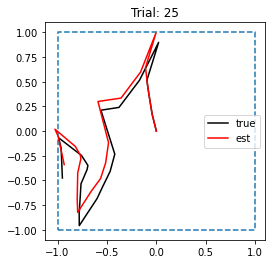

In [7]:
trial_plt = 25
t_start = 0
t_stop = 20

pos_plt = pos[trial_plt][t_start:t_stop]
pos_est_plt = pos_est[trial_plt][t_start:t_stop]

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
motion.plot_position_estimate(boundary, pos_plt, pos_est_plt, ax)

plt.savefig('test_model_04_20.png')

## Check for bias in initial position

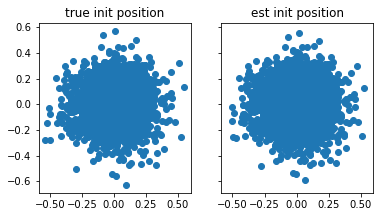

In [8]:
# True initial positions
x0 = pos[:, 0, 0]
y0 = pos[:, 0, 1]

# Estimated initial positions
x0_est = pos_est[:, 0, 0]
y0_est = pos_est[:, 0, 1]

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

ax[0].scatter(x0, y0)
ax[0].set_title('true init position')
ax[0].set_aspect(1.0)

ax[1].scatter(x0_est, y0_est)
ax[1].set_title('est init position')
ax[1].set_aspect(1.0)

plt.savefig('init_position_compare.png')

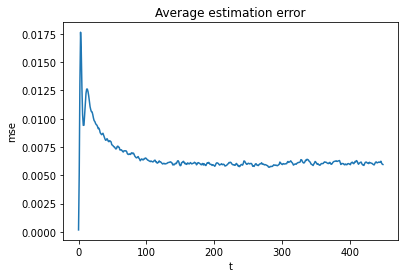

In [9]:
sq_err = np.sum((pos_est - pos) ** 2, axis=2)
mse = np.mean(sq_err, axis=0)
plt.plot(mse)
plt.title('Average estimation error')
plt.xlabel('t')
plt.ylabel('mse')

plt.savefig('avg_error.png')

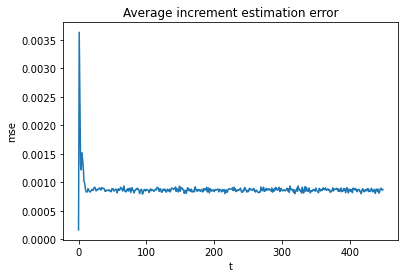

In [10]:
dpos = np.diff(pos, axis=1, prepend=0)
dpos_est = np.diff(pos_est, axis=1, prepend=0)

sq_err = np.sum((dpos_est - dpos) ** 2, axis=2)
mse = np.mean(sq_err, axis=0)
plt.plot(mse)
plt.title('Average increment estimation error')
plt.xlabel('t')
plt.ylabel('mse')

plt.savefig('inc_error.png')

In [11]:
for name, param in model.named_parameters():
    if name == 'rnn.bias_hh_l0':
        print(param)

Parameter containing:
tensor([ 1.0391e-04,  9.3689e-05,  8.6465e-06,  3.2452e-05,  6.2577e-06,
        -8.0904e-05, -1.8870e-04,  3.1730e-04,  1.0505e-04,  4.1687e-05,
        -9.1047e-05, -2.8773e-04,  6.0744e-05,  6.2919e-06,  1.7271e-04,
        -1.8797e-04, -2.8659e-05,  4.5312e-05, -2.3745e-05, -2.9587e-04,
         6.1001e-05, -2.6867e-04,  3.6411e-05, -1.4594e-05, -3.9076e-05,
         1.7273e-04, -1.4032e-05,  1.7574e-05, -7.9463e-05,  1.7755e-04,
         1.4794e-04,  5.0011e-05,  1.5131e-04, -1.8579e-04,  6.7512e-05,
         6.8123e-05, -1.9678e-04,  1.0349e-04,  2.3148e-04, -1.4531e-05,
        -4.5285e-05, -4.3899e-05,  1.5141e-04, -6.3606e-05, -3.5599e-05,
        -2.6702e-04, -1.8700e-04, -1.3424e-04,  4.4967e-05,  1.6717e-05,
        -1.1529e-04,  1.1757e-04, -3.7729e-06,  8.9068e-05, -2.8293e-04,
        -4.0581e-05,  2.1230e-04,  2.1981e-05,  5.9112e-05, -1.4720e-04,
        -9.8307e-05,  1.8948e-04, -1.1066e-04, -8.3476e-05,  8.5521e-05,
         1.1126e-04,  8.7148e

In [12]:
u_vals[0][0]

array([-0.05242591,  0.04481944, -0.16107468,  0.01129895,  0.08455623,
       -0.05707388, -0.11173882,  0.09751483, -0.16877839,  0.10637523,
        0.18421511, -0.28206632, -0.05529666,  0.12017667, -0.10444695,
        0.02543169,  0.00192711,  0.28453287,  0.02079402,  0.05748305,
        0.09511755,  0.1179399 ,  0.05189342,  0.17329094, -0.20711023,
        0.19742171, -0.01240383, -0.05104316, -0.07935096,  0.04972482,
       -0.20067863,  0.27008927, -0.02004696,  0.01134307,  0.2835571 ,
       -0.22473635,  0.21838096, -0.19753934, -0.04669338,  0.30979547,
        0.23319349, -0.08772627,  0.0601618 ,  0.02706893,  0.2550214 ,
       -0.30445942, -0.25544807,  0.36218226,  0.41092834, -0.26001704,
       -0.3181284 ,  0.04212173, -0.00989936, -0.47669947, -0.4430672 ,
       -0.13531125,  0.08345284,  0.10812424,  0.01325748,  0.24730055,
        0.4189438 ,  0.00741044, -0.00103406,  0.13792607,  0.27539572,
        0.24931994,  0.06111866,  0.1280135 ,  0.15351172, -0.15